In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.edgecolor'] = 'gray'

# Definir a cor das linhas dos ticks maiores e menores como cinza
mpl.rcParams['xtick.color'] = 'gray'
mpl.rcParams['ytick.color'] = 'gray'
mpl.rcParams['xtick.labelcolor'] = 'black'
mpl.rcParams['ytick.labelcolor'] = 'black'
plt.rcParams['axes.labelsize'] = 14  # Axis labels
plt.rcParams['xtick.labelsize'] = 12  # X-axis tick labels
plt.rcParams['ytick.labelsize'] = 12  # Y-axis tick labels
plt.rcParams['font.size'] = 14  # General font size

In [4]:
df = pd.read_csv('susp_data_regions_rw.csv', index_col = 'data_iniSE')

df.index = pd.to_datetime(df.index)

df = df.loc[df.index <= '2024-12-31']

df.head()

,casos_41007,casos_41008,casos_41009,casos_41010,casos_41020
data_iniSE,,,,,
2010-01-17,1.333333,2.333333,33.000000,11.333333,19.666667
2010-01-24,1.666667,3.333333,51.666667,11.000000,23.333333
2010-01-31,1.000000,2.666667,76.000000,10.333333,24.666667
2010-02-07,1.000000,2.666667,125.333333,9.000000,35.000000
2010-02-14,0.666667,2.333333,219.333333,12.000000,49.000000


In [5]:
df_pop = pd.read_csv('pop_22_region.csv')


In [6]:
for id_ in df_pop.id_regional.unique():

    df[f'casos_{id_}'] = 100000*df[f'casos_{id_}']/df_pop.loc[df_pop.id_regional == id_]['pop22'].values[0]
df.head()

,casos_41007,casos_41008,casos_41009,casos_41010,casos_41020
data_iniSE,,,,,
2010-01-17,0.463884,0.628191,7.408272,1.947342,4.618920
2010-01-24,0.579855,0.897416,11.598810,1.890067,5.480074
2010-01-31,0.347913,0.717932,17.061475,1.775517,5.793221
2010-02-07,0.347913,0.717932,28.136468,1.546418,8.220111
2010-02-14,0.231942,0.628191,49.238819,2.061891,11.508156


In [7]:
data = df.resample('Y').sum().reset_index().melt(id_vars=['data_iniSE'], var_name='region', value_name='casos')#.melted()


valores_a_substituir = ['casos_41007', 'casos_41008', 'casos_41009', 'casos_41010', 'casos_41020']
novos_valores = ['Pato Branco', 'Francisco Beltrão', 'Foz do Iguaçu', 'Cascavel', 'Toledo']

data = data.replace(valores_a_substituir, novos_valores)
data['year'] = data.data_iniSE.dt.year

data.head()

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_7847/202623904.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data = df.resample('Y').sum().reset_index().melt(id_vars=['data_iniSE'], var_name='region', value_name='casos')#.melted()


,data_iniSE,region,casos,year
0,2010-12-31,Pato Branco,7.538120,2010
1,2011-12-31,Pato Branco,13.220702,2011
2,2012-12-31,Pato Branco,16.235950,2012
3,2013-12-31,Pato Branco,25.861549,2013
4,2014-12-31,Pato Branco,15.656095,2014


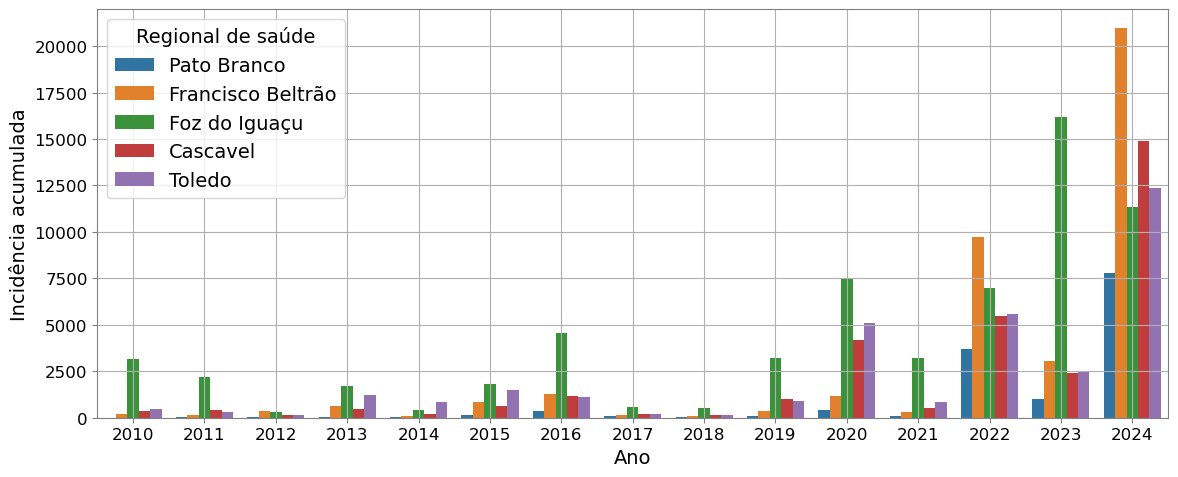

In [12]:
_,ax = plt.subplots(figsize=(12,5))

sns.barplot(data = data, x = 'year', y = 'casos', hue = 'region',ax=ax)

ax.set_ylabel('Incidência acumulada')
ax.set_xlabel('Ano')

ax.legend(title="Regional de saúde")
ax.grid()
#plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()

plt.savefig(f'../figures/inc_acum_reg.png', dpi =300, bbox_inches = 'tight')


In [9]:
data.loc[data.data_iniSE == '2024-12-31'].sort_values(by = 'casos', ascending = False)

,data_iniSE,region,casos,year
29,2024-12-31,Francisco Beltrão,20947.383630,2024
59,2024-12-31,Cascavel,14908.217209,2024
74,2024-12-31,Toledo,12361.324769,2024
44,2024-12-31,Foz do Iguaçu,11350.595356,2024
14,2024-12-31,Pato Branco,7771.221546,2024
